In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

In [3]:
#Carga de archivos de pozo
datalog=np.loadtxt('las.txt',delimiter='\t',skiprows=2) 
depthlog=np.array(datalog[:,0]) #Profundidad (Z) [m]
GR=np.array(datalog[:,1]) #Rayos Gamma [API]
RHOB=np.array(datalog[:,2]) #Bulk Density [g/cm3]
NPhi=np.array(datalog[:,3]) #Neutron Porosity 
Resis=np.array(datalog[:,4]) #Resistividad

#Carga de archivos de nucleos
datacore=np.loadtxt('core.txt',delimiter='\t',skiprows=2) 
depthcore=np.array(datacore[:,0]) #Profundidad (Z) [m]
Poro=np.array(datacore[:,1]) #Porosidad 
Perm=np.array(datacore[:,2]) #Permeabilidad [mD] 

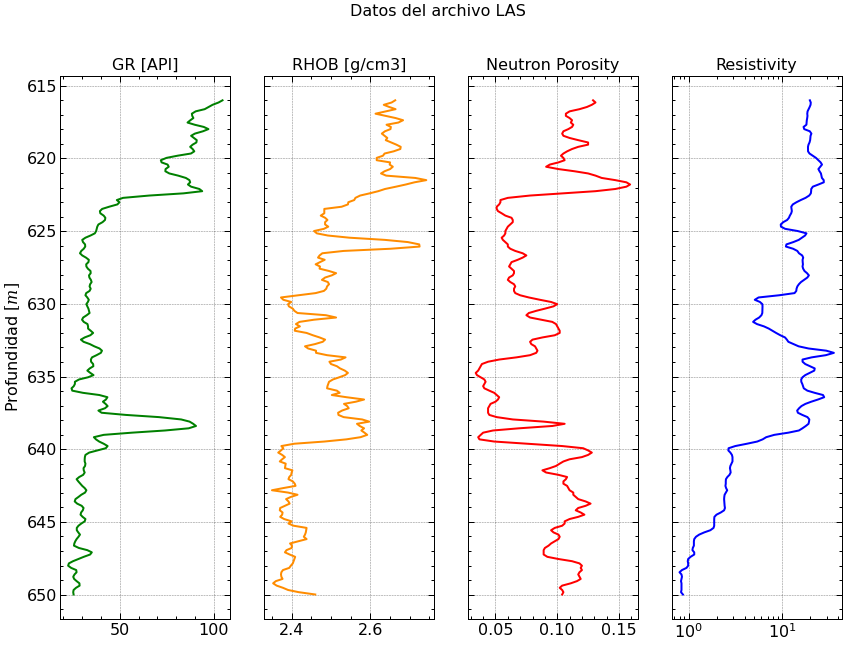

In [4]:
#figura 1 y 2
fig, ax = plt.subplots(1,4,figsize=(14,10))
ax[0].plot(GR,depthlog,'-g',label='Rayos Gamma')
ax[0].invert_yaxis()
ax[0].set_title('GR [API]')

ax[1].plot(RHOB,depthlog,'',label='Densidad',color='darkorange')
ax[1].invert_yaxis()
ax[1].set_title('RHOB [g/cm3]')

ax[2].plot(NPhi,depthlog,'-r',label='Porosidad Neutron')
ax[2].invert_yaxis()
ax[2].set_title('Neutron Porosity')

ax[3].semilogx(Resis,depthlog,'-b',label='Resistividad')
ax[3].invert_yaxis()
ax[3].set_title('Resistivity')

for ax in ax.flat:
    ax.set(ylabel='Profundidad $\it{[m]}$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in fig.get_axes():
    ax.label_outer()

fig.suptitle('Datos del archivo LAS', fontsize=16)
plt.show()

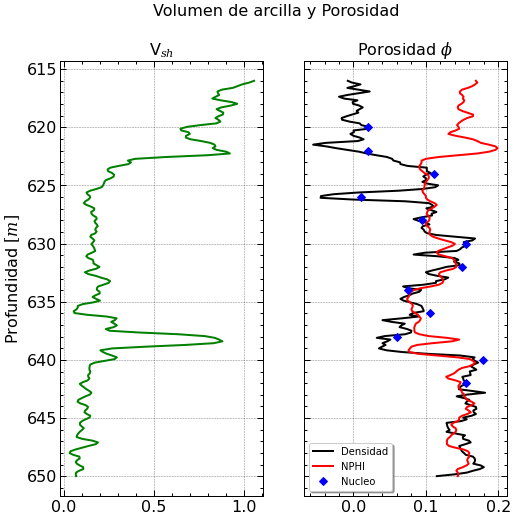

In [5]:
#figura3
GRcn=20
GRsh=100
rhoma=2.65
rhofl=1
Vsh=(GR-GRcn)/(GRsh-GRcn) #Volumen de Arcilla
Dphi=(rhoma-RHOB)/(rhoma-rhofl) #Densidad
NPhia=NPhi+0.04 #Porosidad Neutron

fig, ax = plt.subplots(1,2, figsize=(8,8))
ax[0].plot(Vsh,depthlog,'-g',label='V$_{sh}$')
ax[0].invert_yaxis()
ax[0].set_title('V$_{sh}$')

ax[1].plot(Dphi,depthlog,'-k',label='Densidad')
ax[1].plot(NPhia,depthlog,'-r',label='NPHI')
ax[1].plot(Poro,depthcore,'Db',label='Nucleo')
ax[1].invert_yaxis()
ax[1].set_title('Porosidad $\it{\phi}$')
legend = ax[1].legend(loc='best', shadow=True, fontsize='medium')

for ax in ax.flat:
    ax.set(ylabel='Profundidad $\it{[m]}$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in fig.get_axes():
    ax.label_outer()

fig.suptitle('Volumen de arcilla y Porosidad', fontsize=16)
plt.show()

C:\Users\inten\AppData\Local\Temp/ipykernel_1276/840604690.py:6: RuntimeWarning: divide by zero encountered in true_divide
  Sw=((Rw/Resis)*(1/np.abs(Dphi)**m))**(1/n) #Ley de Archie


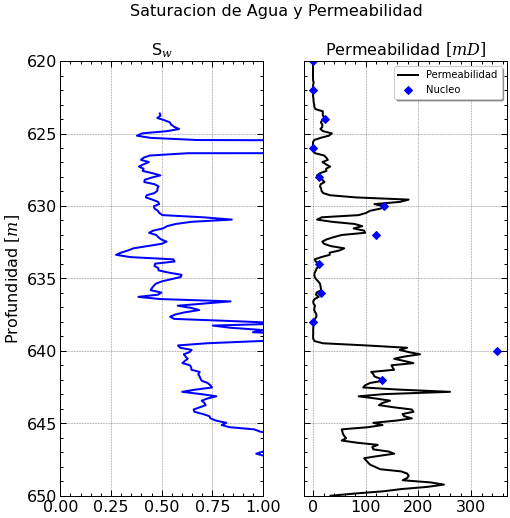

In [6]:
#figura4
Rw=0.03 #Resistividad del agua de las formacion
m=1.96 #Exponente de cementacion
n=2.19 #Exponente de saturacion

Sw=((Rw/Resis)*(1/np.abs(Dphi)**m))**(1/n) #Ley de Archie

kh=557880*(np.abs(Dphi)**(4.5)) #ley de Athy
dd=depthlog
for a in range(0,50):
    Sw=np.delete(Sw,0)
    dd=np.delete(dd,0)


fig, ax = plt.subplots(1,2, figsize=(8,8))
ax[0].plot(Sw,dd,'-b',label='S$_w$')
ax[0].set_ylim([650, 620])
ax[0].set_xlim([0, 1])
ax[0].set_title('S$_w$')

ax[1].plot(kh,depthlog,'-k',label='Permeabilidad')
ax[1].plot(Perm,depthcore,'Db',label='Nucleo')
ax[1].set_ylim([650, 620])
ax[1].set_title('Permeabilidad $\it{[mD]}$')
legend = ax[1].legend(loc='best', shadow=True, fontsize='medium')

for ax in ax.flat:
    ax.set(ylabel='Profundidad $\it{[m]}$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in fig.get_axes():
    ax.label_outer()

fig.suptitle('Saturacion de Agua y Permeabilidad', fontsize=16)
plt.show()


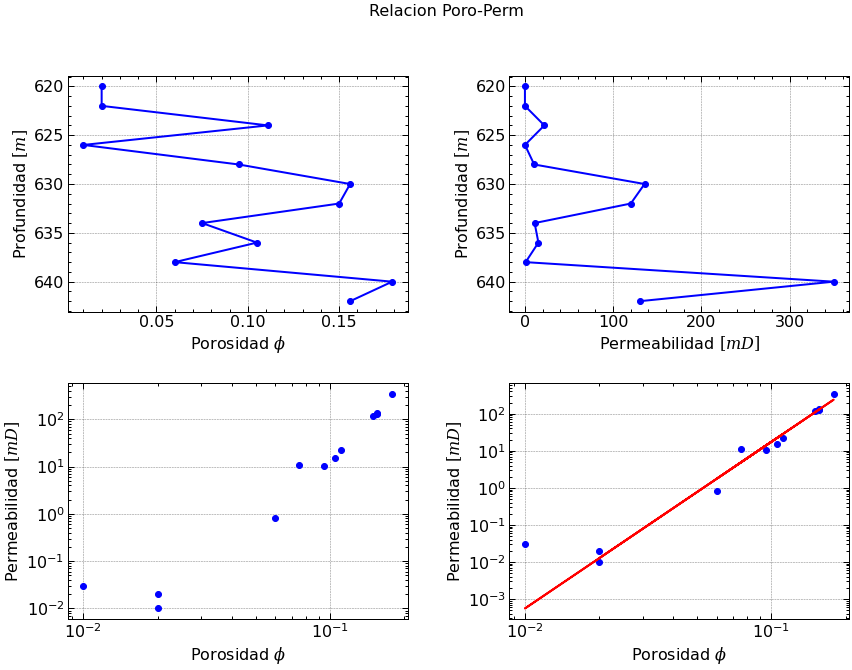

In [7]:
#figura 5
k=553577*Poro**4.5
fig, ax = plt.subplots(2,2, figsize=(14,10))
ax[0,0].plot(Poro,depthcore,'ob',label='')
ax[0,0].plot(Poro,depthcore,'-b',label='')
ax[0,0].invert_yaxis()
ax[0,0].set_xlabel('Porosidad $\it{\phi}$')
ax[0,0].set_ylabel('Profundidad $\it{[m]}$')

ax[0,1].plot(Perm,depthcore,'ob',label='')
ax[0,1].plot(Perm,depthcore,'-b',label='')
ax[0,1].invert_yaxis()
ax[0,1].set_xlabel('Permeabilidad $\it{[mD]}$')
ax[0,1].set_ylabel('Profundidad $\it{[m]}$')

ax[1,0].loglog(Poro,Perm,'ob',label='')
ax[1,0].set_xlabel('Porosidad $\it{\phi}$')
ax[1,0].set_ylabel('Permeabilidad $\it{[mD]}$')

ax[1,1].loglog(Poro,Perm,'ob',label='')
ax[1,1].loglog(Poro,k,'-r',label='')
ax[1,1].set_xlabel('Porosidad $\it{\phi}$')
ax[1,1].set_ylabel('Permeabilidad $\it{[mD]}$')

fig.suptitle('Relacion Poro-Perm', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

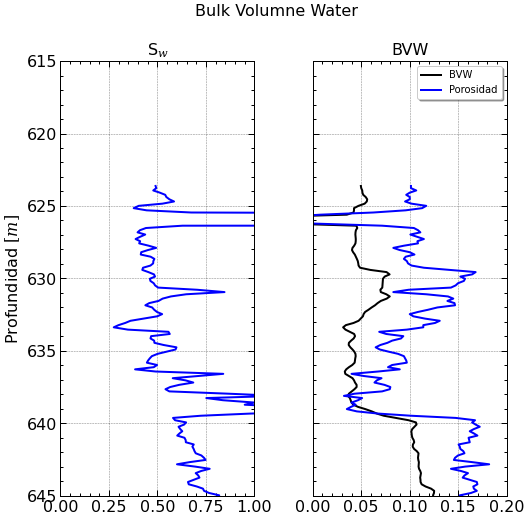

In [11]:
#figura 6
Dphi1=Dphi
for a in range(0,50):
    Dphi1=np.delete(Dphi1,0)

BVW=(Dphi1*Sw)

fig, ax = plt.subplots(1,2, figsize=(8,8))
ax[0].plot(Sw,dd,'-b',label='S$_w$')
ax[0].set_ylim([645, 615])
ax[0].set_xlim([0, 1])
ax[0].set_title('S$_w$')

ax[1].plot(BVW,dd,'-k',label='BVW')
ax[1].plot(Dphi1,dd,'-b',label='Porosidad')
ax[1].set_ylim([645, 615])
ax[1].set_xlim([0, 0.2])
ax[1].set_title('BVW')
legend = ax[1].legend(loc='best', shadow=True, fontsize='medium')

for ax in ax.flat:
    ax.set(ylabel='Profundidad $\it{[m]}$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in fig.get_axes():
    ax.label_outer()
plt.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Bulk Volumne Water', fontsize=16)

plt.show()